<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#JupyterNB-Preparation" data-toc-modified-id="JupyterNB-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>JupyterNB Preparation</a></span></li><li><span><a href="#Oanda-API-setup" data-toc-modified-id="Oanda-API-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Oanda API setup</a></span></li><li><span><a href="#Input-for-download-data-from-Oanda-API" data-toc-modified-id="Input-for-download-data-from-Oanda-API-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Input for download data from Oanda API</a></span></li><li><span><a href="#Download-data-from-Oanda" data-toc-modified-id="Download-data-from-Oanda-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Download data from Oanda</a></span></li><li><span><a href="#Write-data-to-disk-in-HDF5" data-toc-modified-id="Write-data-to-disk-in-HDF5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Write data to disk in HDF5</a></span></li><li><span><a href="#Create-a-middle-for-each-candle" data-toc-modified-id="Create-a-middle-for-each-candle-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create a middle for each candle</a></span></li><li><span><a href="#Import-data-in-DataFrame-and-drop-irrelevant-columns" data-toc-modified-id="Import-data-in-DataFrame-and-drop-irrelevant-columns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Import data in DataFrame and drop irrelevant columns</a></span></li><li><span><a href="#Extract-the-date_time-features-in-separate-columns" data-toc-modified-id="Extract-the-date_time-features-in-separate-columns-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Extract the date_time features in separate columns</a></span></li><li><span><a href="#Remove-columns-we-don't-need" data-toc-modified-id="Remove-columns-we-don't-need-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Remove columns we don't need</a></span></li><li><span><a href="#Add-indicator-columns" data-toc-modified-id="Add-indicator-columns-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Add indicator columns</a></span></li><li><span><a href="#Remove-the-first-records-for-which-we-don't-have-indicators" data-toc-modified-id="Remove-the-first-records-for-which-we-don't-have-indicators-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Remove the first records for which we don't have indicators</a></span></li><li><span><a href="#Plot-data-at-set-interval-and-export-as-.png-in-the-relevant-folders" data-toc-modified-id="Plot-data-at-set-interval-and-export-as-.png-in-the-relevant-folders-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Plot data at set interval and export as .png in the relevant folders</a></span></li></ul></div>

## JupyterNB Preparation

In [147]:
import numpy as np
import pandas as pd
import oandapy as opy
import csv
import matplotlib.pyplot as plt

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# JupyterNB dark theme plotting made visible
plt.style.use(['dark_background'])

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Oanda API setup

In [148]:
accountid="insert_your_Oanda_account_ID_here"
token="insert_your_Oanda_access_token_here"
env="practice"
oanda = opy.API(environment=env, access_token=token)

## Input for download data from Oanda API

In [149]:
d1 = '2018-03-01'
d2 = '2018-03-27'
gr = 'M1'
instrument = 'GBP_USD'

## Download data from Oanda

In [79]:
# Download data in chunks
dates = pd.date_range(start=d1, end=d2, freq='B')
df = pd.DataFrame()
 
for i in range(0, len(dates) -1):
    d1 = str(dates[i]).replace(' ', 'T')
    d2 = str(dates[i+1]).replace(' ', 'T')
    try:
        data = oanda.get_history(instrument=instrument, start=d1, end=d2, granularity=gr)
        df = df.append(pd.DataFrame(data['candles']))
    except:
        pass
 
index = pd.DatetimeIndex(df['time'], tz='UTC')
df.index = index
df = df.drop(['time', 'complete'], axis=1)

In [80]:
d1 = '2018-03-01'
d2 = '2018-03-27'

## Write data to disk in HDF5

In [81]:
PATH = "/home/alex/DL/AlgoTrading/"
os.chdir(PATH)
h5s = pd.HDFStore(instrument + '_' + gr + '_' + d1[:10] + '_' + d2[:10] + '.h5s', 'w', format='table')
h5s['data'] = df
h5s.close()

## Create a middle for each candle

In [82]:
df['openMid'] = (df['openAsk'] + df['openBid'])/2
df['closeMid'] = (df['closeAsk'] + df['closeBid'])/2
df.head(20)

,closeAsk,closeBid,highAsk,highBid,lowAsk,lowBid,openAsk,openBid,volume,openMid,closeMid
time,,,,,,,,,,,
2018-03-01 00:00:00+00:00,1.37547,1.37522,1.37553,1.37531,1.37530,1.37506,1.37553,1.37530,65,1.375415,1.375345
2018-03-01 00:01:00+00:00,1.37550,1.37528,1.37550,1.37530,1.37546,1.37522,1.37546,1.37522,18,1.375340,1.375390
2018-03-01 00:02:00+00:00,1.37549,1.37531,1.37550,1.37531,1.37548,1.37529,1.37549,1.37529,6,1.375390,1.375400
2018-03-01 00:03:00+00:00,1.37563,1.37544,1.37563,1.37544,1.37550,1.37527,1.37550,1.37529,25,1.375395,1.375535
2018-03-01 00:04:00+00:00,1.37554,1.37533,1.37557,1.37536,1.37553,1.37533,1.37556,1.37536,10,1.375460,1.375435
2018-03-01 00:05:00+00:00,1.37548,1.37526,1.37548,1.37527,1.37546,1.37526,1.37546,1.37526,5,1.375360,1.375370
2018-03-01 00:06:00+00:00,1.37548,1.37527,1.37549,1.37528,1.37546,1.37526,1.37547,1.37526,10,1.375365,1.375375
2018-03-01 00:07:00+00:00,1.37577,1.37555,1.37577,1.37555,1.37553,1.37528,1.37553,1.37528,55,1.375405,1.375660
2018-03-01 00:08:00+00:00,1.37570,1.37552,1.37577,1.37557,1.37568,1.37549,1.37576,1.37557,17,1.375665,1.375610


## Import data in DataFrame and drop irrelevant columns

In [150]:
from copy import deepcopy

PATH = "/home/alex/DL/AlgoTrading/"
os.chdir(PATH)
h5s = pd.HDFStore(instrument + '_' + gr + '_' + d1[:10] + '_' + d2[:10] + '.h5s', 'r')
df = h5s['data']
h5s.close()
df['closeMid'] = (df['closeBid']+df['closeAsk'])/2
data = df[['closeBid', 'closeAsk', 'closeMid']]


In [151]:
# Size of DataFrame
data.shape

(25510, 3)

In [152]:
# Display all the data
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)
display_all(data)

,closeBid,closeAsk,closeMid
time,,,
2018-03-01 00:00:00+00:00,1.37522,1.37547,1.375345
2018-03-01 00:01:00+00:00,1.37528,1.37550,1.375390
2018-03-01 00:02:00+00:00,1.37531,1.37549,1.375400
2018-03-01 00:03:00+00:00,1.37544,1.37563,1.375535
2018-03-01 00:04:00+00:00,1.37533,1.37554,1.375435
2018-03-01 00:05:00+00:00,1.37526,1.37548,1.375370
2018-03-01 00:06:00+00:00,1.37527,1.37548,1.375375
2018-03-01 00:07:00+00:00,1.37555,1.37577,1.375660
2018-03-01 00:08:00+00:00,1.37552,1.37570,1.375610


## Extract the date_time features in separate columns

In [153]:
data['date'] = data.index.astype(str).str[:10]
data['hour'] = data.index.astype(str).str[-14:]
data['hour'] = data['hour'].astype(str).str[:8]

/home/alex/anaconda3/envs/algot/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/alex/anaconda3/envs/algot/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alex/anaconda3/envs/algot/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

## Remove columns we don't need

In [154]:
data.drop(['closeBid','closeAsk','date'], axis=1, inplace=True)

/home/alex/anaconda3/envs/algot/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Add indicator columns

In [155]:
# MA50
ma = 50
data = data.reindex(columns = np.append(data.columns, ['MA50']))
data['MA50'] = data[['closeMid']].rolling(ma).mean()

In [156]:
# Bollinger Bands
maB = 20
data['BB_20 ma'] = data[['closeMid']].rolling(maB).mean()
data['BB_20 sd'] = data[['closeMid']].rolling(maB).std()
data['BB_Upper Band'] = data['BB_20 ma'] + (data['BB_20 sd']*2)
data['BB_Lower Band'] = data['BB_20 ma'] - (data['BB_20 sd']*2)
data.drop(['BB_20 sd'], axis=1, inplace=True)

## Remove the first records for which we don't have indicators

In [157]:
# Remove the first records which don't have MA calculation
data.drop(data.index[:ma], inplace=True)

In [158]:
len(data.index)

25460

In [159]:
display_all(data)

,closeMid,hour,MA50,BB_20 ma,BB_Upper Band,BB_Lower Band
time,,,,,,
2018-03-01 00:51:00+00:00,1.374990,00:51:00,1.375055,1.374748,1.374987,1.374508
2018-03-01 00:52:00+00:00,1.374865,00:52:00,1.375044,1.374753,1.374999,1.374508
2018-03-01 00:53:00+00:00,1.375135,00:53:00,1.375039,1.374780,1.375067,1.374493
2018-03-01 00:54:00+00:00,1.375200,00:54:00,1.375032,1.374808,1.375144,1.374471
2018-03-01 00:55:00+00:00,1.374820,00:55:00,1.375020,1.374812,1.375146,1.374478
2018-03-01 00:56:00+00:00,1.374600,00:56:00,1.375004,1.374807,1.375151,1.374462
2018-03-01 00:57:00+00:00,1.374995,00:57:00,1.374997,1.374820,1.375173,1.374467
2018-03-01 00:58:00+00:00,1.374995,00:58:00,1.374983,1.374831,1.375191,1.374471
2018-03-01 00:59:00+00:00,1.375065,00:59:00,1.374973,1.374844,1.375219,1.374469


## Plot data at set interval and export as .png in the relevant folders

In [273]:
from ipywidgets import FloatProgress
from IPython.display import display

# Initialize the size of the ViewPort
size_ViewPort = 60
start_ViewPort = 0
end_ViewPort = size_ViewPort

# Progress bar
f = FloatProgress(min=0, max=(len(data.index)/end_ViewPort))
f.description = 'Progress'
display(f)
# go through the DataFrame and create ViewPorts of 30 records
pic_counter = 0
while end_ViewPort <= len(data.index):
    if (round(data.iloc[end_ViewPort]['closeMid'], 4) - round(data.iloc[end_ViewPort+1]['closeMid'], 4)) > 0:
        data.iloc[start_ViewPort:end_ViewPort].plot(
            kind='line', grid=False, legend=False, figsize=(3, 3)).axis('off')
        PATH = "/home/alex/DL/AlgoTrading/data/ViewPorts/valid/buy"
        os.chdir(PATH)
        plt.savefig('buy.' + str(pic_counter) + '.png', dpi=100)
        plt.close()
        pic_counter += 1
        start_ViewPort = end_ViewPort
        end_ViewPort += size_ViewPort
    elif (round(data.iloc[end_ViewPort]['closeMid'], 4) - round(data.iloc[end_ViewPort+1]['closeMid'], 4)) == 0:
        data.iloc[start_ViewPort:end_ViewPort].plot(
            kind='line', grid=False, legend=False, figsize=(3, 3)).axis('off')
        PATH = "/home/alex/DL/AlgoTrading/data/ViewPorts/valid/hold"
        os.chdir(PATH)
        plt.savefig('hold.' + str(pic_counter) + '.png', dpi=100)
        plt.close()
        pic_counter += 1
        start_ViewPort = end_ViewPort
        end_ViewPort += size_ViewPort
    else:
        data.iloc[start_ViewPort:end_ViewPort].plot(
            kind='line', grid=False, legend=False, figsize=(3, 3)).axis('off')
        PATH = "/home/alex/DL/AlgoTrading/data/ViewPorts/valid/sell"
        os.chdir(PATH)
        plt.savefig('sell.' + str(pic_counter) + '.png', dpi=100)
        plt.close()
        pic_counter += 1
        start_ViewPort = end_ViewPort
        end_ViewPort += size_ViewPort
    f.value += 1
f.bar_style = 'success'

FloatProgress(value=0.0, description='Progress', max=424.3333333333333)

/home/alex/anaconda3/envs/algot/lib/python3.6/site-packages/matplotlib/axes/_base.py:2504: RuntimeWarning: invalid value encountered in double_scalars
  delta = (x1t - x0t) * margin


In [274]:
# Clean up the folder of .ipynb_checkpoints to be able to run the model

PATH = "/home/alex/DL/AlgoTrading/data/ViewPorts/valid/buy"
os.chdir(PATH)
!rm -rf .ipynb_checkpoints
PATH = "/home/alex/DL/AlgoTrading/data/ViewPorts/valid/sell"
os.chdir(PATH)
!rm -rf .ipynb_checkpoints
PATH = "/home/alex/DL/AlgoTrading/data/ViewPorts/valid/hold"
os.chdir(PATH)
!rm -rf .ipynb_checkpoints

/home/alex/anaconda3/envs/algot/lib/python3.6/site-packages/matplotlib/axes/_base.py:2504: RuntimeWarning: invalid value encountered in double_scalars
  delta = (x1t - x0t) * margin


(300, 300, 4)

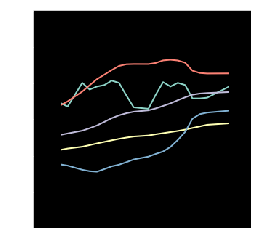

In [272]:
data.iloc[start_ViewPort:end_ViewPort].plot(
    kind='line', grid=False, legend=False,figsize=(3,3))
PATH = "/home/alex/DL/AlgoTrading/data/ViewPorts/test1"
os.chdir(PATH)
plt.axis('off')
plt.savefig('test.png',dpi=100)
plt.close();
img = plt.imread('test.png')
plt.imshow(img);
img.shape